In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Function to carry out Gillespie algorithm

In [84]:
# Stoichiometric matrix S
# Each row corresponds to a reaction, and each column corresponds to a species
# S[i, j] represents the change in the number of molecules of species j in reaction i
S = np.array([[1,1,0,0],[0,0,1,0],[0,0,1,0]])

# Change matrix P
# Each row corresponds to a reaction, and each column corresponds to a species
# P[i, j] represents the net change in the number of molecules of species j in reaction i
P = np.array([[0,0,1,0],[1,1,0,0],[0,0,0,1]])

# Rate constants vector K
# K[i] represents the rate constant for reaction i
K = np.array([1, 1000,0.1])  # Assuming arbitrary rate constants

# Initial conditions vector IC
# IC[j] represents the initial number of molecules of species j
IC = np.array([20,20,0,0])  # Assuming 10 molecules of A and 10 molecules of B initially

tspan = np.linspace(0, 600, 100)

[rows, cols] = S.shape

if np.size(S) != np.size(P):
    print("ERROR: reaction definitions are inconsistent")

if len(IC) != cols:
    print("ERROR: initial conditions are inconsistent")

if len(K) != rows:
    print("ERROR: reaction rates are inconsistent")

random.seed(2)  # random seed in simulation

N_rxn = 0  # reaction counter

t = [tspan[0]]  # set current time to start of tspan vector, adding to it
maxT = tspan[-1]  # set max time to end of tspan vector

X = [IC]  # initialize matrix of chemicals, adding to it

#while current timestep is less than max timesteps, and there are still reacting species present
while t[-1] < maxT and np.sum(X[-1]) > 0:
    # Step 1: calculate species reaction rates, a, given the system state
    a = K.copy()
    for r in range(rows):
        for c in range(cols):
            if S[r, c] == 1:
                a[r] *= X[-1][c]
            elif S[r, c] == 2:
                a[r] *= X[-1][c] * (X[-1][c] - 1) / 2
            elif S[r, c] == 3:
                a[r] *= X[-1][c] * (X[-1][c] - 1) * (X[-1][c] - 2) / 6

    a0 = np.sum(a)  # total rate of change of the system

    if a0 == 0:
        print("System cannot change, exit")
        X.append(X[-1])
        t.append(maxT)
        break

    # Step 2: calculate tau and r using random number generators
    # determine time of next reaction:
    p1 = random.random()
    tau = (1 / a0) * np.log(1 / p1)
    # determine which next reaction is:
    p2 = random.random()
    for r in range(rows):
        if np.sum(a[:r + 1]) >= p2 * a0:
            break
    #print("next reaction is: ",r)
    # Step 3: carry out the reaction
    t.append(t[-1] + tau)
    N_rxn += 1  # N_rxn is number of reactions so far.
    curr_x = X[-1].copy()
    for c in range(cols):
        curr_x[c] += P[r, c] - S[r, c]

    X.append(curr_x)

print("Simulation completed")

Simulation completed


Text(0, 0.5, 'Concentration')

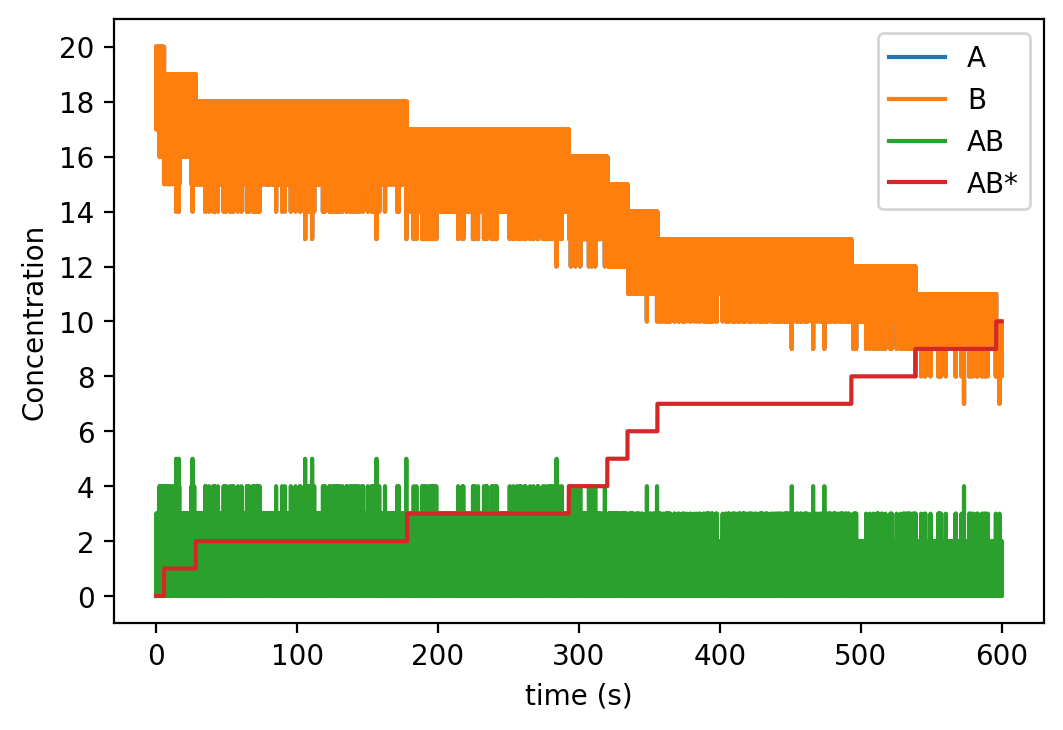

In [85]:
plt.figure(dpi=200)
plt.plot(t,np.asarray(X)[:,0],label='A')
plt.plot(t,np.asarray(X)[:,1],label='B')
plt.plot(t,np.asarray(X)[:,2],label='AB')
plt.plot(t,np.asarray(X)[:,3],label='AB*')
plt.legend()
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.xlabel('time (s)')
plt.ylabel('Concentration')